In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

In [33]:
def read_csv(filename):
    data=pd.read_csv(filename)
    return data

data=read_csv("Elections.csv")

In [34]:
def exploratory_analysis(filename):
    data=pd.read_csv(filename)
    print("\nNumber of rows and columns of Data Frame")
    print(data.shape)
    
    print("\n The Description of columns of Data Frame")
    print(data.columns)
    
    print("\n Description of few Data rows")
    print(data.head())
    
    print("\n Statistical Description of Data")
    print(data.describe())
    
    print("\n Data Information")
    print(data.info())
    
    print("\n Null values in the data frame")
    print(data.isnull().any())
    
data=exploratory_analysis("Elections.csv")


Number of rows and columns of Data Frame
(7930, 21)

 The Description of columns of Data Frame
Index(['CANDIDATE_ID', 'CANDIDATE_NAME', 'AGE', 'CONSTITUENCY', 'STATE',
       'PARTY', 'NO_PENDING_CRIMINAL_CASES', 'EDUCATION', 'EARNINGS',
       'STATE_LITERACY_RATE', 'STATE_SEAT_SHARE', 'PARTY_GRP_IDX',
       'AGE_GROUP_IDX', 'EDUCATION_GROUP_IDX', 'DELTA_STATE_VOTER_TURNOUT',
       'NO_OF_PHASES', 'RE_CONTEST', 'SEX', 'WINNER', 'TOTAL_VOTES',
       'VOTING_PERCENTAGE'],
      dtype='object')

 Description of few Data rows
   CANDIDATE_ID      CANDIDATE_NAME  AGE CONSTITUENCY      STATE  \
0          5814        GODAM NAGESH   54     ADILABAD  TELANGANA   
1          5819        AARE ELLANNA   53     ADILABAD  TELANGANA   
2          5823    NETHAVATH RAMDAS   46     ADILABAD  TELANGANA   
3          4588       RAMESH RATHOD   53     ADILABAD  TELANGANA   
4          5815  DHARAVTH NARENDHAR   27     ADILABAD  TELANGANA   

            PARTY  NO_PENDING_CRIMINAL_CASES      EDUCATIO

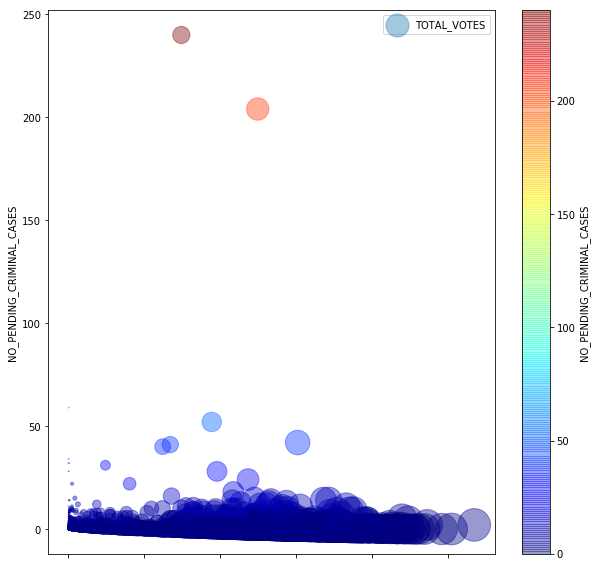

In [53]:
from pandas.plotting import scatter_matrix
def visualization(filename):
    data=pd.read_csv(filename)

    #simple scatter plot
    #data.plot(kind="scatter",x=" ",y=" ",figsize=(10,10),alpha=0.1)
    #plt.show()
    
    #simple histogram 
    #data.plot(kind="hist",x="EDUCATION",figsize=(10,10),alpha=0.1)
    #plt.show()
    
    #simple box plot
    #data.plot(kind='box')
    
    #Histogram 
    #print("Histogram for all the attributes")
    #data.hist(bins=50,figsize=(20,15))
    #plt.show()

    #scatter plot
    #print("Scatter matrix of all the Attributes")
    #scatter_matrix(data,figsize=(10,10),alpha=0.1)
    #plt.show()
    
    #Scatterplot with color map
    data.plot(kind="Scatter",x="TOTAL_VOTES",y="NO_PENDING_CRIMINAL_CASES",alpha=0.4,s=data["TOTAL_VOTES"]/1000,label="TOTAL_VOTES",figsize=(10,10),c="NO_PENDING_CRIMINAL_CASES",cmap=plt.get_cmap("jet"),colorbar=True,)
    plt.legend()
    plt.show()
    
    
    
data=visualization("Elections.csv")

In [48]:
def correlation(filename):
    data=pd.read_csv(filename)
    print(data.corr())
    
data=correlation("housing.csv")

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [49]:
import numpy as np
def split_test_train_dataset(filename,percentage):
    data=pd.read_csv(filename)
    random=np.random.permutation(len(data))
    test_size=int(len(data)*percentage)
    test=random[:test_size]
    train=random[test_size:]
    return data.iloc[train],data.iloc[test]    

train_data,test_data=split_test_train_dataset("Elections.csv",0.2)
print(len(test_data))
print(len(train_data))


1586
6344


In [73]:
#methods to handle missing values
import sklearn
from sklearn.preprocessing import Imputer
new=[]
def missing_values(filename):
    data=pd.read_csv(filename)
    for col in data.columns:
        #if data[col].dtype==object:
        count=0
        count=[count + 1 for x in data[col] if x=="None"]
        print(col + " " + str(sum(count)))
#data=missing_values("housing.csv")

def drop_column_with_toomany_missingvalues(filename):
    data=pd.read_csv(filename)
    data.drop("colwithtoomanymissingvalue",axis=1,inplace=True)

def drop_rows_with_toomany_missingvalues(filename):
    data=pd.read_csv(filename)
    print(data.shape)
    cols=["total_bedrooms"]
    for column in cols:
        data.loc[data[column]==129,column] == np.nan
        data.dropna(axis=0,inplace=True)
    print(data.shape)
data=drop_rows_with_toomany_missingvalues("housing.csv")

def imputer(filename,option):
    data=pd.read_csv(filename)
    imputer=Imputer(strategy=option)
    data_num=data.drop("ocean_proximity",axis=1)
    imputer.fit(data_num)
    
#data=imputer("housing.csv","median")

(20640, 10)
(20433, 10)


In [82]:
#dealing with duplicates 
def find_duplicates(filename):
    data=pd.read_csv(filename)
    print(data.shape)
    
    #type column name in place of CANDIDATE_ID.if you want to see if there are duplicates
    print(data.CANDIDATE_ID.unique().shape)

def drop_duplicates(filename):
    data=pd.read_csv(filename)
    print(data.shape)
    data.drop_duplicates("PARTY",keep="first",inplace=True)
    print(data.shape)
    
drop_duplicates("Elections.csv")
find_duplicates("Elections.csv")

(7930, 21)
(677, 21)
(7930, 21)
(7930,)


In [92]:
from sklearn import preprocessing
data=pd.read_csv("Elections.csv")
#scaler=preprocessing.StandardScaler().fit(data["EARNINGS"])
#data["EARNINGS"]=scaler.transform(data["EARNINGS"])


In [44]:
#feature engineering example 
data=pd.read_csv("Automobile price data _Raw_.csv")
print(data['num-of-cylinders'].value_counts())
new_categories={'three':'three_four','four':'three_four','five':'five_six','six':'five_six','twelve':'eight_twelve','eight':'eight_twelve','two':'two'}
data['num-of-cylinders']=[new_categories[x] for x in data['num-of-cylinders']]
print(data['num-of-cylinders'].value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
three_four      160
five_six         35
eight_twelve      6
two               4
Name: num-of-cylinders, dtype: int64


In [43]:
#code to sample the series based on time, average over 3 minutes and split it over 30 seconds 
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
print(series)
print(series.resample('3T').sum())
print(series.resample('30S').asfreq()[0:5])

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int32
2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int32
2000-01-01 00:00:00    0.0
2000-01-01 00:00:30    NaN
2000-01-01 00:01:00    1.0
2000-01-01 00:01:30    NaN
2000-01-01 00:02:00    2.0
Freq: 30S, dtype: float64
